# AI Community @ Семинар № 6
## Градиентный спуск: практика.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

%matplotlib inline

In [2]:
def plot_data(X, Y):
    '''Plots first two features of X and assigns colors according to labels Y.'''
    plt.figure(figsize=(8, 8))
    plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.coolwarm)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    
def plot_line(w, x_from=-3, x_to=3):
    '''Plots a separating line from (x_from, y_from) to (x_to, y_to)
    according to weights of a linear classifier a(x, w) = w^T x.'''
    y_from = -(w[1] / w[0]) * x_from
    y_to = -(w[1] / w[0]) * x_to
    
    plt.plot([x_from, x_to], [y_from, y_to])

In [3]:
def generate_data(blue_count=200, red_count=200):
    '''Generates data from two normal ditributions.'''
    X_blue = np.random.normal(1, size=(blue_count, 2))
    y_blue = np.ones(blue_count)

    X_red = np.random.normal(-1, size=(red_count, 2))
    y_red = -np.ones(red_count)

    X, y = np.concatenate((X_red, X_blue)), np.concatenate((y_red, y_blue))
    return X, y

In [4]:
# Hint: use scipy.special

def loss(w, X, Y):
    '''Loss function of a linear classifier.'''
    pass

def loss_grad(w, X, Y):
    '''Gradient of the loss function.'''
    pass

In [5]:
def gradient_descent(loss, loss_grad, X, Y, n_iter=100, 
                     learning_rate=0.1, verbose=True):
    '''Performs a gradient descent procedure.
    Loss function and its gradient are passes as arguments.'''
    samples_count, features_count = X.shape
    
    w = np.random.normal(size=features_count)
    loss_history = []
    for i in range(n_iter):
        current_loss = loss(w, X, Y)
        current_grad = loss_grad(w, X, Y)
        
        if verbose and i % 30 == 0:
            print('Iteration: {} Loss: {} Grad: {}'.format(
                i,
                np.linalg.norm(current_loss, axis=0).sum(),
                np.linalg.norm(current_grad, axis=0).sum()))
        
        w -= learning_rate * current_grad.sum(axis=1)
        loss_history.append(current_loss.mean())
        
    return w, loss_history

In [6]:
X, y = generate_data(blue_count=200, red_count=300)

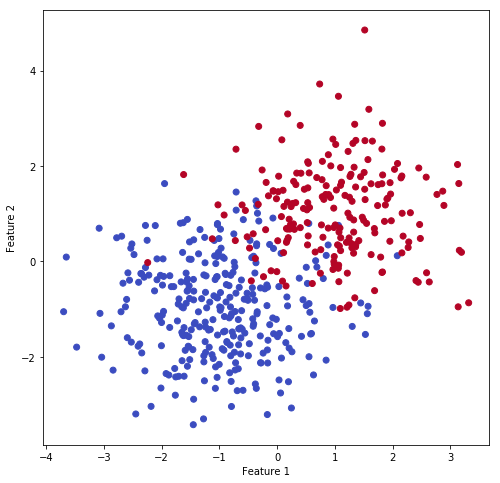

In [7]:
plot_data(X, y)

In [8]:
w, hist = gradient_descent(loss, loss_grad, X, y, learning_rate=0.01,
                           verbose=True, n_iter=190)

Iteration: 0 Loss: 19.20320421169573 Grad: 2998.1073939443536
Iteration: 30 Loss: 21.171829571387278 Grad: 84.0057709387903
Iteration: 60 Loss: 20.868397989817677 Grad: 179.6208195717823
Iteration: 90 Loss: 21.31213692419796 Grad: 63.62428329576398
Iteration: 120 Loss: 21.27244291145743 Grad: 64.19824038234401
Iteration: 150 Loss: 19.424478438025126 Grad: 310.7675786492023
Iteration: 180 Loss: 6.9691949491581955 Grad: 1314.541098394785


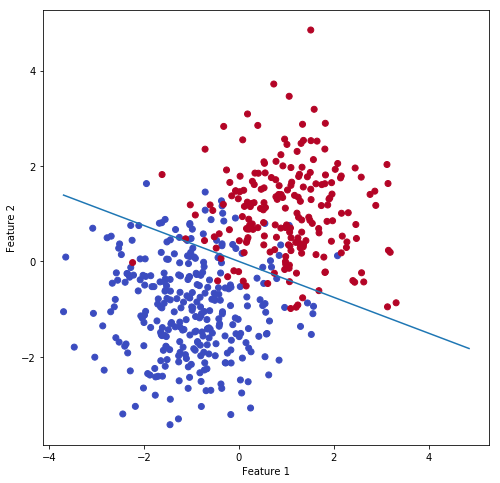

In [9]:
plot_data(X, y)
plot_line(w, X.min(), X.max())